In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv("data/data.txt")
data.columns = data.columns.str.strip()

x_train = data[['variance', 'skewness']].values
y_train = data['class'].values

m, n = x_train.shape

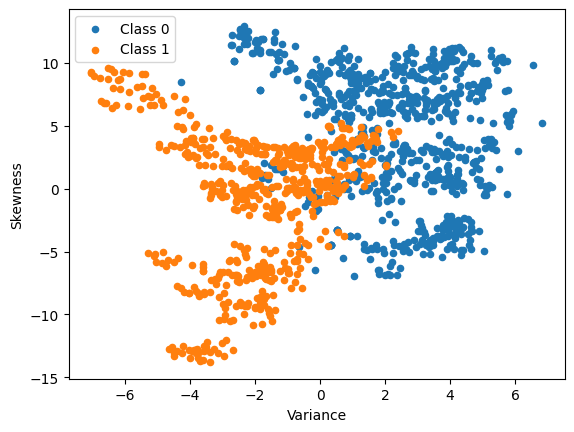

In [26]:
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color='tab:blue', label='Class 0', s=20)
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color='tab:orange', label='Class 1', s=20)
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.legend()
plt.show()

### Implemetation Plan
1. Sigmoid Function
2. Cost function
3. Gradient function
4. Gradient Descent Function
5. Predict Function

In [27]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [28]:
def cost_function(x, y, w, b):
    cost_sum = 0

    for i in range(m):
        z = np.dot(w, x[i]) + b
        g = sigmoid(z)

        cost_sum += -y[i] * np.log(g) - (1 - y[i]) * np.log(1 - g)

    return (1/m) * cost_sum

In [29]:
def gradient_function(x, y, w, b):
    dw = np.zeros(n)
    db = 0
    
    for i in range(m):
        z = np.dot(w, x[i]) + b
        g = sigmoid(z)

        db += (g - y[i])
        
        for j in range(n):
            dw[j] += (g - y[i]) * x[i, j]

    dw = (1/m) * dw
    db = (1/m) * db

    return db, dw

In [30]:
def gradient_descent(x, y, alpha, iterations):
    w = np.zeros(n)
    b = 0

    for i in range(iterations):
        db, dw = gradient_function(x, y, w, b)

        w = w - alpha * dw
        b = b - alpha * db

        if i % 1000 == 0:
            print(f"Iteration {i}: Cost: {cost_function(x, y, w, b)}")

    return w, b

In [31]:
def predict(x, w, b):
    preds = np.zeros(m)

    for i in range(m):
        z = np.dot(w, x[i]) + b
        g = sigmoid(z)

        preds[i] = 1 if g >= 0.5 else 0

    return preds

In [32]:
learning_rate = 0.01
iterations = 10000

final_w, final_b = gradient_descent(x_train, y_train, learning_rate, iterations)

predictions = predict(x_train, final_w, final_b)
accuracy = np.mean(predictions == y_train) * 100

print(f"Training accuracy: {accuracy:.2f}%")

Iteration 0: Cost: 0.6637066908767508
Iteration 1000: Cost: 0.26702008862220766
Iteration 2000: Cost: 0.2641802421924851
Iteration 3000: Cost: 0.2634469866192246
Iteration 4000: Cost: 0.26322948213304126
Iteration 5000: Cost: 0.26316242638683385
Iteration 6000: Cost: 0.26314132083296393
Iteration 7000: Cost: 0.2631345997209962
Iteration 8000: Cost: 0.26313244514874184
Iteration 9000: Cost: 0.2631317518675332
Training accuracy: 88.56%


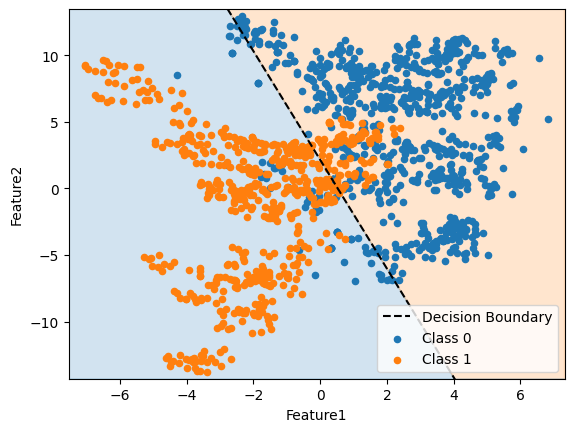

In [33]:
m = -final_w[0] / final_w[1]
c = -final_b / final_w[1]

xmin, xmax = x_train[:, 0].min() - 0.5, x_train[:, 0].max() + 0.5
ymin, ymax = x_train[:, 1].min() - 0.5, x_train[:, 1].max() + 0.5
xd = np.array([xmin, xmax])
yd = m * xd + c

plt.plot(xd, yd, 'k', ls='--', label='Decision Boundary')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color='tab:blue', label='Class 0', s=20)
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color='tab:orange', label='Class 1', s=20)
plt.legend()
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()